In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("adad.jpg")

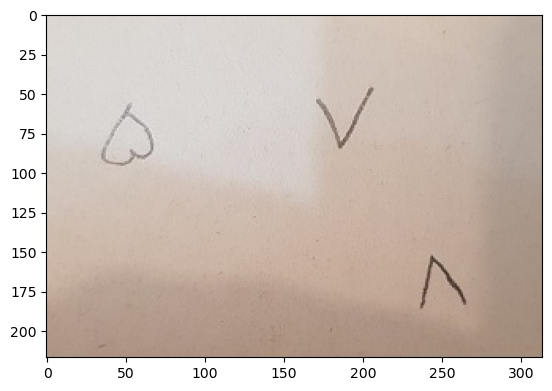

In [3]:
plt.imshow(img[...,::-1])

In [4]:
img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [5]:
gray_blur = cv2.GaussianBlur(img_grey,(9,9),0)

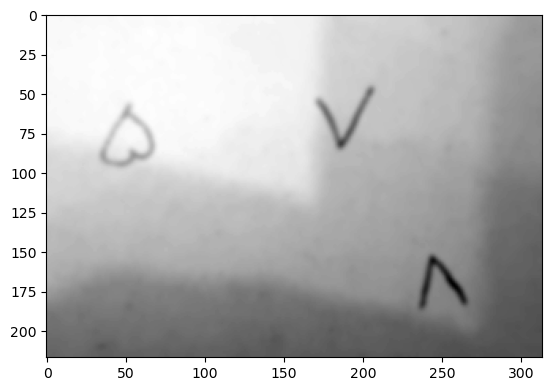

In [6]:
plt.imshow(gray_blur,'gray')

In [7]:
th2 = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,3)

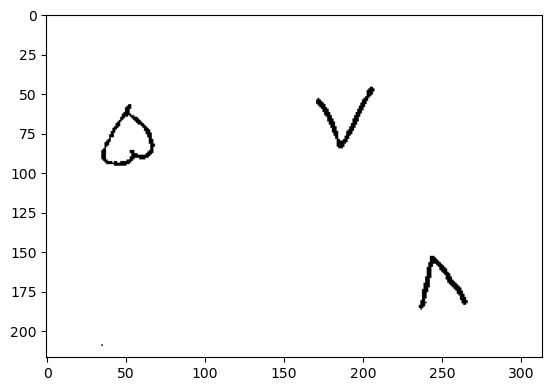

In [8]:
plt.imshow(th2,'gray')

In [9]:
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [10]:
for contour in contours:
    print(contour.shape)

(4, 1, 2)
(4, 1, 2)
(65, 1, 2)
(50, 1, 2)
(51, 1, 2)
(99, 1, 2)


In [11]:
#all = cv2.drawContours(img, contours, -1, (0,255,0) , 3)

In [12]:
#plt.imshow(all)

In [13]:
for c in contours:
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.circle(img, (cx,cy), 2, (255,0,0), -1)
    

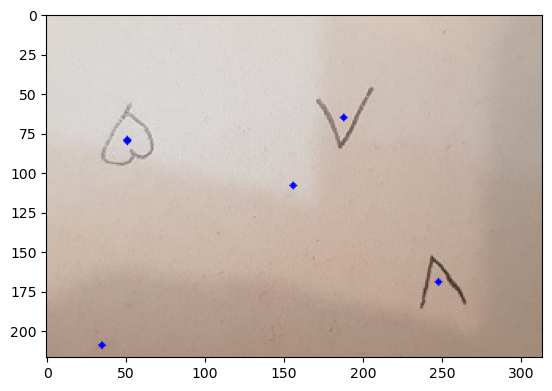

In [14]:
plt.imshow(img[...,::-1])

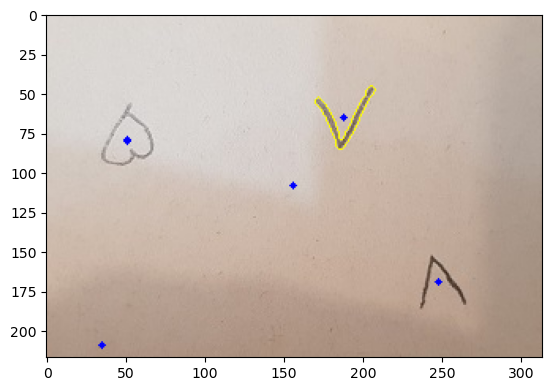

In [27]:
drawing = img.copy()
cv2.drawContours(drawing, [contours[5]], -1, (0,255,255), 1)
plt.imshow(drawing[...,::-1])

In [28]:
boundRect = cv2.boundingRect(contours[5])

In [29]:
boundRect

(170, 45, 39, 41)

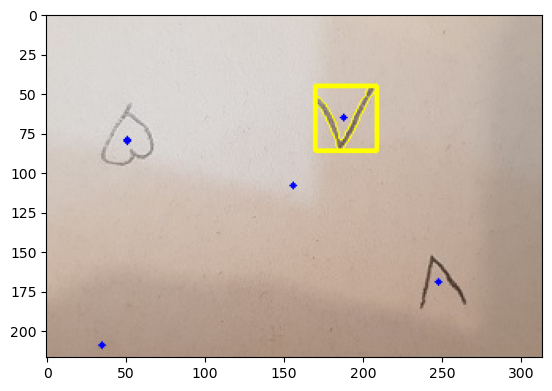

In [30]:
cv2.rectangle(drawing, (int(boundRect[0]), int(boundRect[1])),(int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])),(0,255,255),2)
plt.imshow(drawing[...,::-1])